## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_squared_error as mse

from pandas_profiling.profile_report import ProfileReport

pd.set_option('display.max_columns', 500)

## Dados

In [2]:
treino = pd.read_csv('../datasets/train.csv')
teste = pd.read_csv('../datasets/test.csv')

treino_teste = pd.concat([treino, teste], ignore_index=True)

In [3]:
treino

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

## Criando Baseline

### Treino e Teste

In [4]:
X = treino.drop(['Id', 'SalePrice'], axis=1).copy()

y = treino['SalePrice'].copy()

Xtr, Xval, ytr, yval = train_test_split(X, y, random_state=42)

### Dummy Regressor

In [5]:
dummy = DummyRegressor(strategy='mean')

dummy.fit(Xtr, ytr)

DummyRegressor()

### Plot Model

In [6]:
def plot_preds(model, xval, yval):

    preds = model.predict(xval)

    erro = np.sqrt(mse(yval, preds))

    plt.figure(figsize=(15, 8))

    ax = sns.lineplot(y=yval.sort_index(), x=yval.sort_index().index)

    sns.lineplot(y=pd.Series(preds, index=yval.index).sort_index(),
                 x=yval.sort_index().index)

    plt.legend(['yval', 'ypred'])

    plt.title('Validação vs. Preds', fontdict={'fontsize': 20})

    plt.annotate(f'RMSE: {erro:.2f}',
                 xy=(76, yval.sort_index().max() * 0.9),
                 fontsize=20)

    plt.show()
    print(f'O RMSE do {model} é de: {(erro):.2f}')

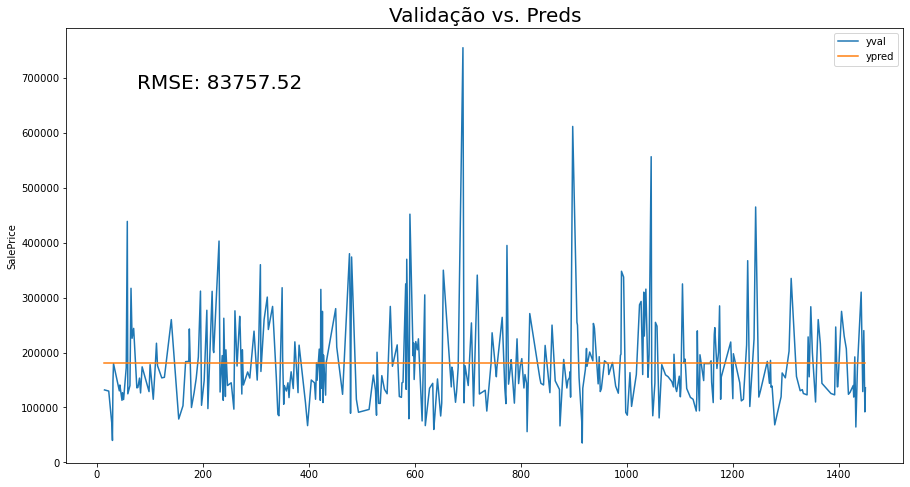

O RMSE do DummyRegressor() é de: 83757.52


In [7]:
plot_preds(dummy, Xval, yval)

## Tratamento de Dados

### Profile Report

In [8]:
report = ProfileReport(treino, 'House Pricing', explorative=True)

In [9]:
# report.to_file('Report Treino - House Pricing.html')

### Missing Values

In [10]:
missing = treino_teste.isna().sum()
filtro = treino_teste.isna().sum() > 0

missing_df = pd.DataFrame(missing[filtro], columns=['Nulos'])
missing_df['Nulos %'] = missing_df['Nulos'] / len(treino_teste)

missing_df[missing_df['Nulos %'] > 0.1].sort_values('Nulos %', ascending=False)

,Nulos,Nulos %
PoolQC,2909,0.996574
MiscFeature,2814,0.964029
Alley,2721,0.932169
Fence,2348,0.804385
SalePrice,1459,0.499829
FireplaceQu,1420,0.486468
LotFrontage,486,0.166495


In [11]:
cols_drop = missing_df[missing_df['Nulos %'] > 0.1].sort_values('Nulos %', ascending=False).index.tolist()
cols_drop

['PoolQC',
 'MiscFeature',
 'Alley',
 'Fence',
 'SalePrice',
 'FireplaceQu',
 'LotFrontage']

In [12]:
treino_teste = treino_teste.drop(
    ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'],
    axis=1).copy()

treino_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2917 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [13]:
treino, teste = treino_teste[:len(treino)], treino_teste[len(teste):]

treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

### Novo X e y

In [14]:
X = treino.drop(['Id', 'SalePrice'], axis=1).copy()

y = treino['SalePrice'].copy()

### Label encoder

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [16]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

In [17]:
for col in cat_cols:
    X[col] = encoder.fit_transform(X[col])

X

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,1,2003.0,1,2.0,548.0,4,4,2,0,61,0,0,0,0,0,2,2008,8,4
1,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,1,1976.0,1,2.0,460.0,4,4,2,298,0,0,0,0,0,0,5,2007,8,4
2,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,1,2001.0,1,2.0,608.0,4,4,2,0,42,0,0,0,0,0,9,2008,8,4
3,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,5,1998.0,2,3.0,642.0,4,4,2,0,35,272,0,0,0,0,2,2006,8,0
4,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,1,2000.0,1,3.0,836.0,4,4,2,192,84,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,1,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,2,0.0,3,4,2,2,3,3,5,0.0,5,0.0,953.0,953.0,1,0,1,4,953,694,0,1647,0.0,0.0,2,1,3,1,3,7,6,1,1,1999.0,1,2.0,460.0,4,4,2,0,40,0,0,0,0,0,8,2007,8,4
1456,20,3,13175,1,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,3,119.0,3,4,1,2,3,3,0,790.0,4,163.0,589.0,1542.0,1,4,1,4,2073,0,0,2073,1.0,0.0,2,0,3,1,3,7,2,2,1,1978.0,2,2.0,500.0,4,4,2,349,0,0,0,0,0,0,2,2010,8,4
1457,70,3,9042,1,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,2,0.0,0,2,4,3,1,3,2,275.0,5,0.0,877.0,1152.0,1,0,1,4,1188,1152,0,2340,0.0,0.0,2,0,4,1,2,9,6,2,1,1941.0,1,1.0,252.0,4,4,2,0,60,0,0,0,0,2500,5,2010,8,4
1458,20,3,9717,1,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,2,0.0,3,4,1,3,3,2,2,49.0,4,1029.0,0.0,1078.0,1,2,1,0,1078,0,0,1078,1.0,0.0,1,0,2,1,2,5,6,0,1,1950.0,2,1.0,240.0,4,4,2,366,0,112,0,0,0,0,4,2010,8,4


In [18]:
for col in num_cols:
    X[col] = X[col].fillna(-1)
    
X

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,1,2003.0,1,2.0,548.0,4,4,2,0,61,0,0,0,0,0,2,2008,8,4
1,20,3,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,1,1976.0,1,2.0,460.0,4,4,2,298,0,0,0,0,0,0,5,2007,8,4
2,60,3,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,1,2001.0,1,2.0,608.0,4,4,2,0,42,0,0,0,0,0,9,2008,8,4
3,70,3,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,5,1998.0,2,3.0,642.0,4,4,2,0,35,272,0,0,0,0,2,2006,8,0
4,60,3,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,1,2000.0,1,3.0,836.0,4,4,2,192,84,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,7917,1,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,2,0.0,3,4,2,2,3,3,5,0.0,5,0.0,953.0,953.0,1,0,1,4,953,694,0,1647,0.0,0.0,2,1,3,1,3,7,6,1,1,1999.0,1,2.0,460.0,4,4,2,0,40,0,0,0,0,0,8,2007,8,4
1456,20,3,13175,1,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,3,119.0,3,4,1,2,3,3,0,790.0,4,163.0,589.0,1542.0,1,4,1,4,2073,0,0,2073,1.0,0.0,2,0,3,1,3,7,2,2,1,1978.0,2,2.0,500.0,4,4,2,349,0,0,0,0,0,0,2,2010,8,4
1457,70,3,9042,1,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,2,0.0,0,2,4,3,1,3,2,275.0,5,0.0,877.0,1152.0,1,0,1,4,1188,1152,0,2340,0.0,0.0,2,0,4,1,2,9,6,2,1,1941.0,1,1.0,252.0,4,4,2,0,60,0,0,0,0,2500,5,2010,8,4
1458,20,3,9717,1,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,2,0.0,3,4,1,3,3,2,2,49.0,4,1029.0,0.0,1078.0,1,2,1,0,1078,0,0,1078,1.0,0.0,1,0,2,1,2,5,6,0,1,1950.0,2,1.0,240.0,4,4,2,366,0,112,0,0,0,0,4,2010,8,4


## Modelos

### Treino e Validação

In [19]:
xtr, xval, ytr, yval = train_test_split(X, y, test_size=0.2, random_state=1)

### Regressão Linear

In [20]:
from sklearn.linear_model import LinearRegression, Lasso

reg = LinearRegression()

reg.fit(xtr, ytr)

p = reg.predict(xval)

erro = np.sqrt(mse(yval, p))

print(f'O RMSE do {reg} é de: {(erro):.2f}')

O RMSE do LinearRegression() é de: 34794.46


### Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=1)

rf.fit(xtr, ytr)

erro = np.sqrt(mse(yval, p))

print(f'O RMSE do {rf} é de: {(erro):.2f}')

O RMSE do RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=1) é de: 34794.46


### Ligth GBM

In [25]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(random_state=1, n_jobs=-1)

model.fit(xtr, ytr)

erro = np.sqrt(mse(yval, p))

print(f'O RMSE do {model} é de: {(erro):.2f}')

O RMSE do LGBMRegressor(random_state=1) é de: 34794.46
